In [ ]:
import sys
import os
import sympy as sp
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
import setup_paths

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from tabelle import tabellen_ersteller
from geraden_fit_config import config_1

<H2>Messungen am Mikroskop</H2>

**364.a:** Messung von $\gamma_{obj}$

In [2]:
# x10 Objektiv: B_z=10mm, G=0.9mm
var_names=[Bz, G]=sp.symbols('Bz G')
formula=Bz/G
gaussian_error_propagation(formula, ((Bz,10,1),(G,0.9,0.05)))

Formel: Bz/G
Werte: ((Bz, 10, 1), (G, 0.9, 0.05)) 

Formelwert: 11.1111111111111

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 1.27106544950457 
Ergebnis: 11.1±1.3
Das Ergebnis hat eine Genauigkeit von 11.712%


In [3]:
# x20 Objektiv: B_z=10mm, G=0.5mm
var_names=[Bz, G]=sp.symbols('Bz G')
formula=Bz/G
gaussian_error_propagation(formula, ((Bz,10,1),(G,0.5,0.05)))

Formel: Bz/G
Werte: ((Bz, 10, 1), (G, 0.5, 0.05)) 

Formelwert: 20.0000000000000

Fehlerformel: sqrt((del_Bz/G)**2 + (-Bz*del_G/G**2)**2)
Fehler: 2.82842712474619 
Ergebnis: 20.0±3.0
Das Ergebnis hat eine Genauigkeit von 15.0%


Messung des Gesamtabbildungsmaßstabs $\gamma_M$

In [4]:
# x10 Okular; x10 Objektiv: B=10mm, G=0.1mm
var_names=[B, G]=sp.symbols('B G')
formula=B/G
gaussian_error_propagation(formula, ((B,10,1),(G,0.1,0.005)))

Formel: B/G
Werte: ((B, 10, 1), (G, 0.1, 0.005)) 

Formelwert: 100.000000000000

Fehlerformel: sqrt((del_B/G)**2 + (-B*del_G/G**2)**2)
Fehler: 11.1803398874989 
Ergebnis: 100.0±11.0
Das Ergebnis hat eine Genauigkeit von 11.0%


In [5]:
# x5 Okular; x20 Objektiv: B=9mm, G=0.1mm
var_names=[B, G]=sp.symbols('B G')
formula=B/G
gaussian_error_propagation(formula, ((B,9,1),(G,0.1,0.005)))

Formel: B/G
Werte: ((B, 9, 1), (G, 0.1, 0.005)) 

Formelwert: 90.0000000000000

Fehlerformel: sqrt((del_B/G)**2 + (-B*del_G/G**2)**2)
Fehler: 10.9658560997307 
Ergebnis: 90.0±11.0
Das Ergebnis hat eine Genauigkeit von 12.222%


Berechnung der Vergrößerung $V_{oku}$

In [6]:
# x10 Okular; x10 Objektiv: gamma_M=100; gamma_obj=11.1
var_names=[gamma_M, gamma_obj, s_0, b]=sp.symbols('gamma_M gamma_obj s_0 b')
formula=gamma_M*s_0/(gamma_obj*b)
gaussian_error_propagation(formula, ((gamma_M,100,11),(gamma_obj,11.1,1.3),(s_0,25,0),(b,21.5,0.5)))

Formel: gamma_M*s_0/(b*gamma_obj)
Werte: ((gamma_M, 100, 11), (gamma_obj, 11.1, 1.3), (s_0, 25, 0), (b, 21.5, 0.5)) 

Formelwert: 10.4755918709407

Fehlerformel: sqrt((del_gamma_M*s_0/(b*gamma_obj))**2 + (-del_gamma_obj*gamma_M*s_0/(b*gamma_obj**2))**2 + (-del_b*gamma_M*s_0/(b**2*gamma_obj))**2)
Fehler: 1.70070361339749 
Ergebnis: 10.5±1.7
Das Ergebnis hat eine Genauigkeit von 16.19%


In [7]:
# 5 Okular; 20 Objektiv: gamma_M=90; gamma_obj=20
var_names=[gamma_M, gamma_obj, s_0, b]=sp.symbols('gamma_M gamma_obj s_0 b')
formula=gamma_M*s_0/(gamma_obj*b)
gaussian_error_propagation(formula, ((gamma_M,90,12),(gamma_obj,20.0,2.9),(s_0,25,0),(b,21.5,0.5)))

Formel: gamma_M*s_0/(b*gamma_obj)
Werte: ((gamma_M, 90, 12), (gamma_obj, 20.0, 2.9), (s_0, 25, 0), (b, 21.5, 0.5)) 

Formelwert: 5.23255813953489

Fehlerformel: sqrt((del_gamma_M*s_0/(b*gamma_obj))**2 + (-del_gamma_obj*gamma_M*s_0/(b*gamma_obj**2))**2 + (-del_b*gamma_M*s_0/(b**2*gamma_obj))**2)
Fehler: 1.03788962193715 
Ergebnis: 5.2±1.0
Das Ergebnis hat eine Genauigkeit von 19.231%


**364.b:** Brennweite $f$ des x20-Okulars übers Abbe-Verfahren

In [8]:
# f=G*(T2-T1)/(B2-B1)
var_names=[G, dT, B1, B2]=sp.symbols('G dT B1 B2')
formula=G*dT/(B2-B1)
gaussian_error_propagation(formula, ((G,0.1,0),(dT,60,1),(B1,9,1),(B2,14,1)))

Formel: G*dT/(-B1 + B2)
Werte: ((G, 0.1, 0), (dT, 60, 1), (B1, 9, 1), (B2, 14, 1)) 

Formelwert: 1.20000000000000

Fehlerformel: sqrt((G*del_dT/(-B1 + B2))**2 + (G*dT*del_B1/(-B1 + B2)**2)**2 + (-G*dT*del_B2/(-B1 + B2)**2)**2)
Fehler: 0.340000000000000 
Ergebnis: 1.2±0.3
Das Ergebnis hat eine Genauigkeit von 25.0%


<H2>Messungen am Fernrohr</H2>

**364.c:** Astronomisches Fernrohr mit mind. 6-facher Vergrößerung $V_f=\frac{\frac{B_Z}{f_{oku}}}{\frac{B_Z}{f_{obj}}}=\frac{f_{obj}}{f_{oku}}$ bzw. $V=N/M$

In [9]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 13,1)))

Formel: N/M
Werte: ((N, 100, 0), (M, 13, 1)) 

Formelwert: 7.69230769230769

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 0.591715976331361 
Ergebnis: 7.7±0.6
Das Ergebnis hat eine Genauigkeit von 7.792%


In [10]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,38,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 38, 0)) 

Formelwert: 7.89473684210526

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 7.89473684210526±0.0
Das Ergebnis hat eine Genauigkeit von 0.0%


Am Rand des sichtfeldes tritt starke sphärische Aberation auf, die mit der Vergrößerung zunimmt.

**364.d:** Andere Okularlinsen

$f_{oku}=50,2 \, mm$

In [11]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 16,1)))

Formel: N/M
Werte: ((N, 100, 0), (M, 16, 1)) 

Formelwert: 6.25000000000000

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 0.390625000000000 
Ergebnis: 6.3±0.4
Das Ergebnis hat eine Genauigkeit von 6.349%


In [12]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,50.2,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 50.2, 0)) 

Formelwert: 5.97609561752988

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 5.97609561752988±0.0
Das Ergebnis hat eine Genauigkeit von 0.0%


$f_{oku}=12,7 \, mm$

In [13]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,100,0),(M, 6,2)))

Formel: N/M
Werte: ((N, 100, 0), (M, 6, 2)) 

Formelwert: 16.6666666666667

Fehlerformel: sqrt((-N*del_M/M**2)**2)
Fehler: 5.55555555555556 
Ergebnis: 17.0±6.0
Das Ergebnis hat eine Genauigkeit von 35.294%


In [14]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,12.7,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, 12.7, 0)) 

Formelwert: 23.6220472440945

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: 23.6220472440945±0.0
Das Ergebnis hat eine Genauigkeit von 0.0%


**364.e:** Terrestrisches Fernrohr mit $f_{oku}=38 \, mm$ und $f_{Dreh}=12.7 \, mm$

In [15]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,21,1),(M,3,0.5)))

Formel: N/M
Werte: ((N, 21, 1), (M, 3, 0.5)) 

Formelwert: 7.00000000000000

Fehlerformel: sqrt((del_N/M)**2 + (-N*del_M/M**2)**2)
Fehler: 1.21335164821342 
Ergebnis: 7.0±1.2
Das Ergebnis hat eine Genauigkeit von 17.143%


**364.f:** Gallileisches Fernrohr mit $f_{oku}=-12.5 \, mm$

In [16]:
# Gemessen
var_names=[N, M]=sp.symbols('N M')
formula=N/M
gaussian_error_propagation(formula, ((N,70,10),(M, 5,1)))

Formel: N/M
Werte: ((N, 70, 10), (M, 5, 1)) 

Formelwert: 14.0000000000000

Fehlerformel: sqrt((del_N/M)**2 + (-N*del_M/M**2)**2)
Fehler: 3.44093010681705 
Ergebnis: 14.0±3.0
Das Ergebnis hat eine Genauigkeit von 21.429%


In [17]:
# Erwartet:
var_names=[f_obj, f_oku]=sp.symbols('f_obj f_oku')
formula=f_obj/f_oku
gaussian_error_propagation(formula, ((f_obj,300,0),(f_oku,-12.5,0)))

Formel: f_obj/f_oku
Werte: ((f_obj, 300, 0), (f_oku, -12.5, 0)) 

Formelwert: -24.0000000000000

Fehlerformel: sqrt()
Fehler: 0 
Ergebnis: -24.0±0.0
Das Ergebnis hat eine Genauigkeit von -0.0%


<H2>Messung des Auflösungsvermögens von Linsen</H2>

**364.f:** Bestätigung des kleinsten auflösbaren Sehwinkels nach dem Rayleigh-Kriterium

In [ ]:
# Die Skalenmitte (also 90°) waren bei uns 106.5 skt. Dementsprechend müssen zunächst Skalenteile in Grad bzw. danach in Sehwinkel umgerechnet werden.
mid=106.5
var_names=[DB, xl, E, DS]=sp.symbols('DB xl E DS')
formula_list=[
    DB,
	90,
	E
    ]
evaluate_gaussian_error('g_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['D_B [mm]','D_streifen [mm]', 'E [mm]'])

sqrt((del_DB)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (-0.00938967136150235*DS*del_xl)**2 + (0)**2 + (del_DS*(1.0 - 0.00938967136150235*xl))**2)
sqrt((0)**2 + (0)**2 + (del_E)**2 + (0)**2)
Zeile 1: [3.0, 1e-07, 0.0, 1.5962441315, 6580.0, 100.0]
Zeile 2: [2.0, 1e-07, 19.1549295775, 1.6002159919, 6580.0, 100.0]
Zeile 3: [1.0, 1e-07, 34.3192488263, 1.6089592995, 6580.0, 100.0]
Zeile 4: [0.6, 1e-07, 71.8309859155, 1.6512211639, 6580.0, 100.0]
Zeile 5: [0.3, 1e-07, 170.0, 1.8836123081, 6580.0, 100.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'g_mess_results.csv' gespeichert.


In [19]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[DB, D_str, E]=sp.symbols('DB D_str E')
formula_list=[
    1/DB,
	D_str*sp.pi/(36*E)*10**3
    ]
evaluate_gaussian_error('g_mess_results.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['1/D_B [1/mm]','alpha [rad]'], output_file_suffix='plot')

sqrt((-del_DB/DB**2)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (250*pi*del_D_str/(9*E))**2 + (-250*pi*D_str*del_E/(9*E**2))**2)
Zeile 1: [0.3333333333, 1.11e-08, 0.0, 0.0211699968]
Zeile 2: [0.5, 2.5e-08, 0.2540399613, 0.0215709886]
Zeile 3: [1.0, 1e-07, 0.4551549307, 0.0224317957]
Zeile 4: [1.6666666667, 2.778e-07, 0.952649855, 0.0262522943]
Zeile 5: [3.3333333333, 1.1111e-06, 2.2546046568, 0.0424041983]
Auswertung abgeschlossen. Ergebnisse wurden in 'g_mess_results_plot.csv' gespeichert.


In [20]:
runden_und_speichern('g_mess_results_plot.csv')

Die gerundeten Daten wurden in der CSV-Datei "g_mess_results_plot_rounded.csv" gespeichert.


0.7164509912183651 0.9694748593334284
Fit-Ergebnisse für 1:
Schwerpunkt: (0.964523768 ± 0.000000023, 0.488 ± 0.024)
Steigung: 0.716 ± 0.014
Y-Achsenabschnitt: -0.203 ± 0.017



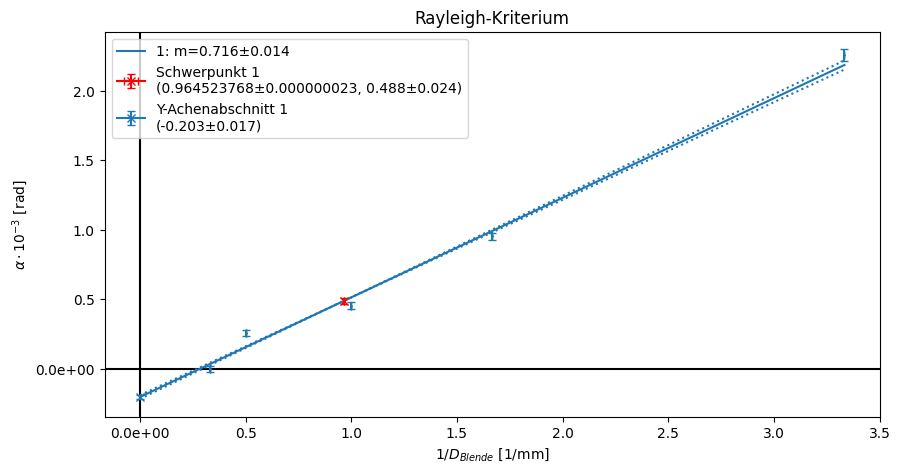

In [21]:
geraden_fit('g_mess_results_plot.csv', title='Rayleigh-Kriterium', x_label=r'$1/D_{Blende}$ [1/mm]', y_label=r'$\alpha \cdot 10^{-3}$ [rad]',
			save=True, linear_fit=True, focus_point=True, plot_y_inter=True, legendlocation='upper left')

In [22]:
# Berechnung der effektiven Lichtwellenlänge
var_names=[m, x]=sp.symbols('m x')
formula=m/1.22
gaussian_error_propagation(formula, ((m,0.000716,0.000014),(f_oku,-12.5,0)), result_lenght=8)

Formel: 0.819672131147541*m
Werte: ((m, 0.000716, 1.4e-05), (f_oku, -12.5, 0)) 

Formelwert: 0.000586885245901639

Fehlerformel: sqrt((0.819672131147541*del_m)**2)
Fehler: 0.0000114754098360656 
Ergebnis: 0.000587±1.1e-05
Das Ergebnis hat eine Genauigkeit von 1.874%
